# IMRCF membrane reactor simulation

Here the following reversible reaction is examined in a packed-bed IMRCF reactor:
$$A(g) \rightleftharpoons B(g)+C(g)$$

B selectively diffuses through the membrane at a rate of $R_B=k_c \cdot C_B$


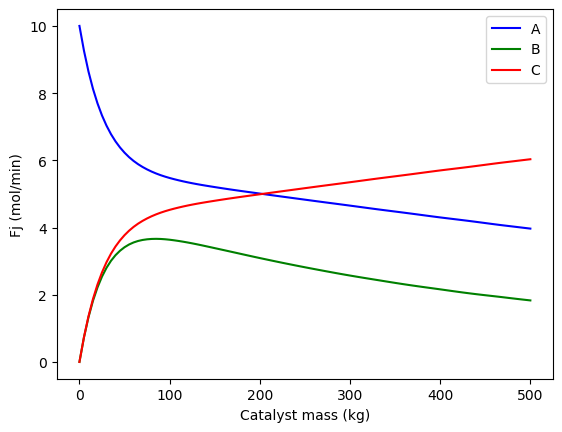

In [2]:
###### 1. Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

###### 2. Specify known values

### Knowns
P0 = 830.6 #kPa
Rg = 8.314  #kPa L / mol K
T0 = 500   #K
kf = 0.8    #min^-1
KC = 0.05  #mol/L
kc = 0.2  #min^-1
F_A0 = 10
F_B0 = 0
F_C0 = 0

# Calculations
C0 = P0 / Rg / T0

###### 3. Initial conditions and integration span
U0 = [F_A0,F_B0,F_C0]
tlim = (0,500)
tlist = np.linspace(tlim[0],tlim[1],num=101)

###### 4. Differential equations
def diff(t,U):
    
    ### Specify identity of each U for clarity
    F_A = U[0]
    F_B = U[1]
    F_C = U[2]
    
    ### Concentration calculations
    Ftot  = F_A + F_B + F_C
    C     = C0
    C_A   = F_A / Ftot * C
    C_B   = F_B / Ftot * C
    C_C   = F_C / Ftot * C
    QC    = C_B * C_C / C_A
    
    ### Rate calculations
    r = kf * C_A * (1 - QC / KC)
    
    ### Formation rates
    R_A = -r
    R_B =  r
    R_C =  r
    
    ### Define derivatives
    dF_A = R_A
    dF_B = R_B - kc*C_B
    dF_C = R_C
    
    ### Populate derivatives array
    dU=np.zeros(len(U))
    dU[0] = dF_A
    dU[1] = dF_B
    dU[2] = dF_C
    
    ### Reorganize list to fit required dimensions 
    dU = np.array(dU).tolist()
    
    return dU

###### 5. Integrate
solution = solve_ivp(diff,tlim,U0,t_eval=tlist)

###### 6. Extract and use data
U = solution.y.T
W = solution.t
F_A = U[:,0]
F_B = U[:,1]
F_C = U[:,2]

W_kc02 = W
FA_kc02 = F_A
FB_kc02 = F_B
FC_kc02 = F_C

### Define pandas dataframe with outputs
soln = pd.DataFrame(W,columns = ['Catalyst mass (kg)'])
soln[['F_A (mol/min)','F_B (mol/min)','F_C (mol/min)']] = pd.DataFrame(U)

### Save dataframe to a csv
soln.to_csv('IMRCF_output.csv')

### Plot data
fig = plt.figure()
ax1 = plt.subplot(111)

# kc=0 vs Time
ax1.plot(W,F_A,'b')
ax1.plot(W,F_B,'g')
ax1.plot(W,F_C,'r')
ax1.legend(['A','B','C'])
ax1.set_xlabel('Catalyst mass (kg)')
ax1.set_ylabel('Fj (mol/min)')

plt.show()


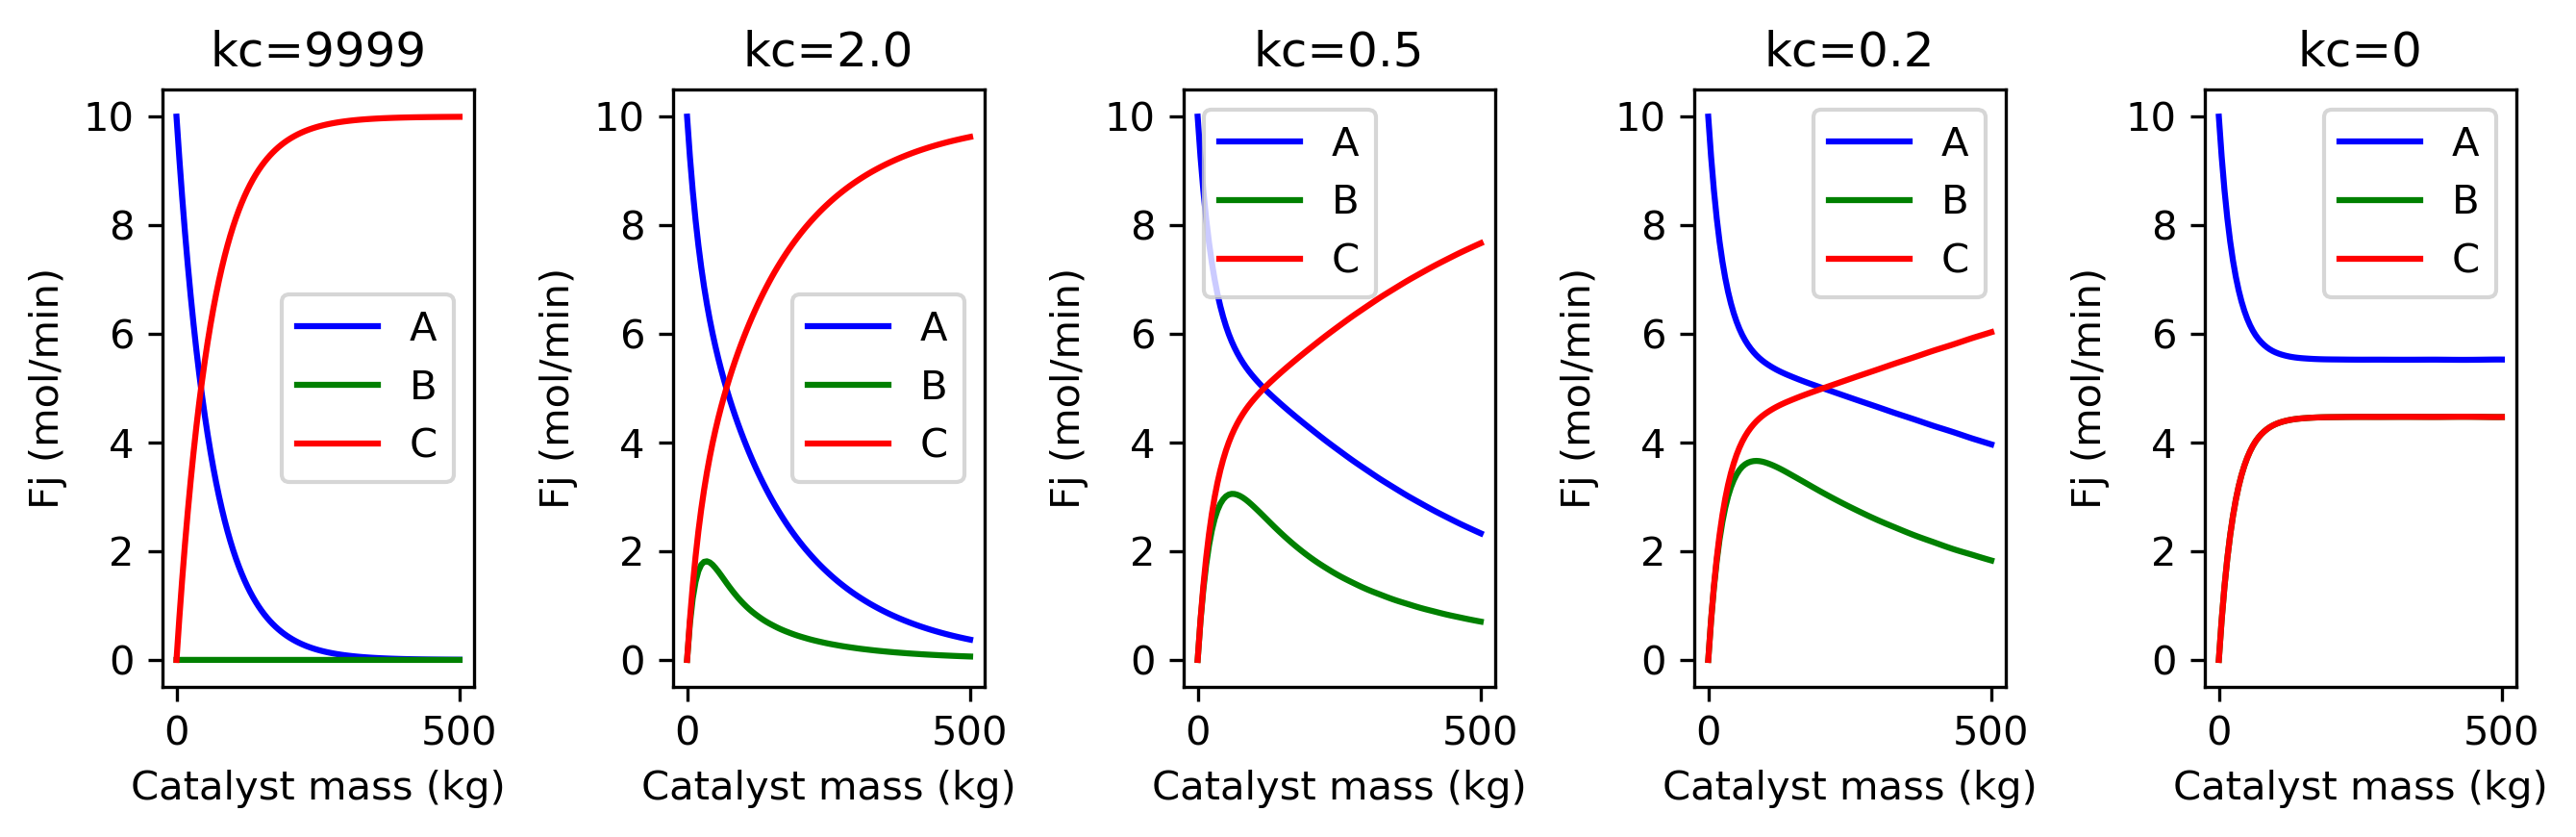

In [20]:
###### Plot multiple data sets
fig = plt.figure(figsize=(9,3),dpi=300)
ax1 = plt.subplot(155)
ax2 = plt.subplot(154)
ax3 = plt.subplot(153)
ax4 = plt.subplot(152)
ax5 = plt.subplot(151)

# kc=0 vs Time
ax1.plot(W_kc0,FA_kc0,'b')
ax1.plot(W_kc0,FB_kc0,'g')
ax1.plot(W_kc0,FC_kc0,'r')
ax1.legend(['A','B','C'])
ax1.set_xlabel('Catalyst mass (kg)')
ax1.set_ylabel('Fj (mol/min)')
ax1.set_title('kc=0')

# kc=0.2 vs Time
ax2.plot(W_kc02,FA_kc02,'b')
ax2.plot(W_kc02,FB_kc02,'g')
ax2.plot(W_kc02,FC_kc02,'r')
ax2.legend(['A','B','C'])
ax2.set_xlabel('Catalyst mass (kg)')
ax2.set_ylabel('Fj (mol/min)')
ax2.set_title('kc=0.2')

# kc=0.5 vs Time
ax3.plot(W_kc05,FA_kc05,'b')
ax3.plot(W_kc05,FB_kc05,'g')
ax3.plot(W_kc05,FC_kc05,'r')
ax3.legend(['A','B','C'])
ax3.set_xlabel('Catalyst mass (kg)')
ax3.set_ylabel('Fj (mol/min)')
ax3.set_title('kc=0.5')

# kc=2.0 vs Time
ax4.plot(W_kc2,FA_kc2,'b')
ax4.plot(W_kc2,FB_kc2,'g')
ax4.plot(W_kc2,FC_kc2,'r')
ax4.legend(['A','B','C'])
ax4.set_xlabel('Catalyst mass (kg)')
ax4.set_ylabel('Fj (mol/min)')
ax4.set_title('kc=2.0')

# kc=9999 vs Time
ax5.plot(W_kcinf,FA_kcinf,'b')
ax5.plot(W_kcinf,FB_kcinf,'g')
ax5.plot(W_kcinf,FC_kcinf,'r')
ax5.legend(['A','B','C'])
ax5.set_xlabel('Catalyst mass (kg)')
ax5.set_ylabel('Fj (mol/min)')
ax5.set_title('kc=9999')

fig.savefig('imcrf.png')

fig.tight_layout()
plt.show()